# Spectra acquisiton
Control both the stepping motor and the camera from this notebook.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from lab_control.spectrometer import thr640

In [3]:
from FLI import FLI
import numpy as np
import time
import logging
import csv
import xarray as xr
from os.path import join

In [4]:
# logger
logger = thr640.logger
camera = FLI()
step_motor = thr640.THR640()

In [5]:
count=400000
step_motor.goto(count)
step_motor.waitUntilReady()

2021-10-13 20:03:32,253:INFO:getting status...
2021-10-13 20:03:39,117:INFO:Move to +400000
2021-10-13 20:03:39,225:INFO:getting status...
2021-10-13 20:03:45,255:INFO:getting status...
2021-10-13 20:03:52,244:INFO:getting status...
2021-10-13 20:03:59,233:INFO:getting status...
2021-10-13 20:04:06,237:INFO:getting status...
2021-10-13 20:04:13,224:INFO:getting status...
2021-10-13 20:04:20,230:INFO:getting status...


In [6]:
%run imaging_tool.py
exposure = 1 *1e3 # ms
vbin = 1

attributes = {
    "temperature": camera.getTemperature(),
    "device_status": camera.getDeviceStatus(),
    "exposure": exposure,
    "frame_type": "light",
}

camera.setExposureTime(exposure)
camera.setVBin(vbin)
camera.setImageArea(10,0,2058,512//vbin)
time.sleep(.5)
camera.exposeFrame()
time.sleep(.1)
# load image
image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
# convert to xarray
data = xr.DataArray(
    image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
)
# save data as NetCDF file
filepath = 'Plasma_400000r_100000ms.nc'.format(count)
filepath = join(r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20210129_yun\Lamp',filepath)
data.to_netcdf(filepath)
plot_image(image_data)

PermissionError: [Errno 13] Permission denied: b'\\\\10.249.254.51\\Public\\Kuzmin\\Experiments-Leprecon\\Spectrometer\\20210129_yun\\Lamp\\Plasma_400000r_100000ms.nc'

In [19]:
count=585000
step_motor.goto(count)
step_motor.waitUntilReady()

<Figure size 432x288 with 0 Axes>

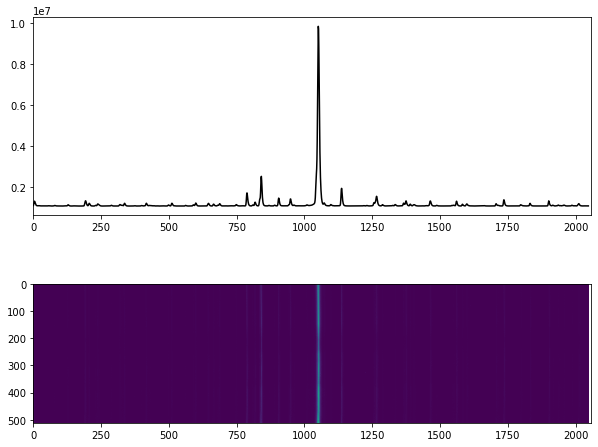

In [20]:
%run imaging_tool.py

exposure = 5 * 1e3 # ms
vbin = 1

attributes = {
    "temperature": camera.getTemperature(),
    "device_status": camera.getDeviceStatus(),
    "exposure": exposure,
    "frame_type": "light",
}

camera.setExposureTime(exposure)
camera.setVBin(vbin)
camera.setImageArea(10,0,2058,512//vbin)
time.sleep(.5)
camera.exposeFrame()
time.sleep(.1)
# load image
image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
# convert to xarray
data = xr.DataArray(
    image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
)
# save data as NetCDF file
filepath = 'Plasma_585000r_30000ms.nc'.format(count)
filepath = join(r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20210129_yun\Lamp',filepath)
data.to_netcdf(filepath)
plot_image(image_data)

In [21]:
count=635000
step_motor.goto(count)
step_motor.waitUntilReady()

<Figure size 432x288 with 0 Axes>

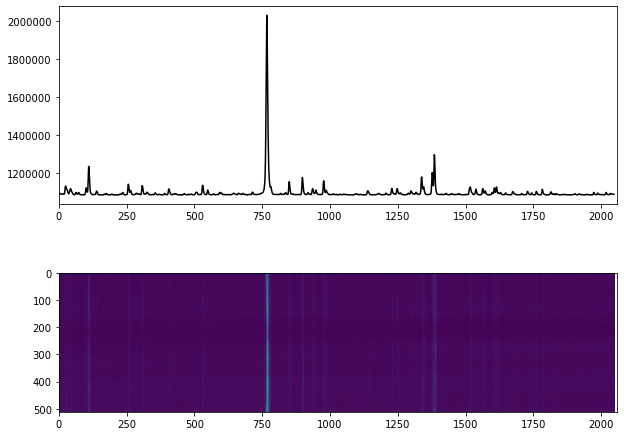

In [22]:
%run imaging_tool.py

exposure = 5 * 1e3 # ms
vbin = 1

attributes = {
    "temperature": camera.getTemperature(),
    "device_status": camera.getDeviceStatus(),
    "exposure": exposure,
    "frame_type": "light",
}

camera.setExposureTime(exposure)
camera.setVBin(vbin)
camera.setImageArea(10,0,2058,512//vbin)
time.sleep(.5)
camera.exposeFrame()
time.sleep(.1)
# load image
image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
# convert to xarray
data = xr.DataArray(
    image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
)
# save data as NetCDF file
filepath = 'Plasma_635000r_30000ms.nc'.format(count)
filepath = join(r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20210129_yun\Lamp',filepath)
data.to_netcdf(filepath)
plot_image(image_data)

In [54]:
count=645000
step_motor.goto(count)
step_motor.waitUntilReady()

<Figure size 432x288 with 0 Axes>

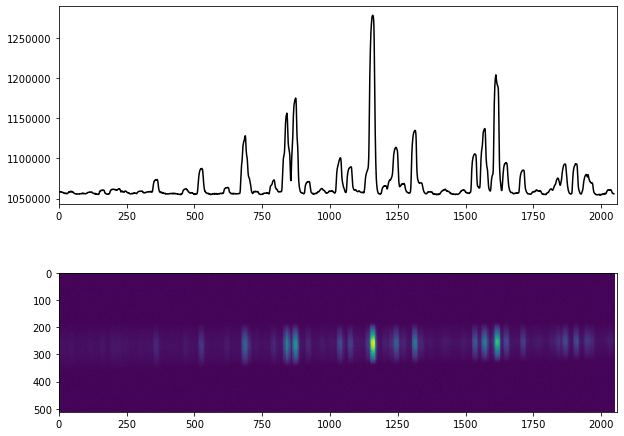

In [55]:
%run imaging_tool.py

exposure = 1 * 1e3 # ms
vbin = 1

attributes = {
    "temperature": camera.getTemperature(),
    "device_status": camera.getDeviceStatus(),
    "exposure": exposure,
    "frame_type": "light",
}

camera.setExposureTime(exposure)
camera.setVBin(vbin)
camera.setImageArea(10,0,2058,512//vbin)
time.sleep(.5)
camera.exposeFrame()
time.sleep(.1)
# load image
image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
# convert to xarray
data = xr.DataArray(
    image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
)
# save data as NetCDF file
filepath = 'Plasma_645000r_1000ms.nc'.format(count)
filepath = join(r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20210119_yun\Plasma',filepath)
data.to_netcdf(filepath)
plot_image(image_data)

# Read from file

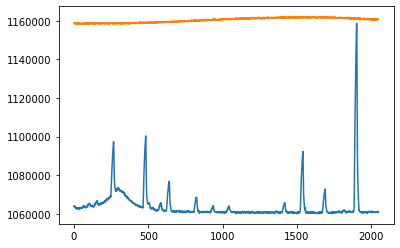

In [7]:
ds_disk = xr.open_dataset('cathode22A.nc')
a = ds_disk.to_array()
ds_disk.close()
plot(a[0].sum(axis=0))

ds_disk = xr.open_dataset('cathodebg.nc')
a = ds_disk.to_array()
ds_disk.close()
plot(a[0].sum(axis=0))

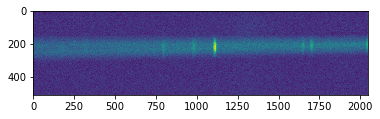

In [8]:
ds_disk = xr.open_dataset(filepath)
a = ds_disk.to_array()
ds_disk.close()
imshow(a[0])

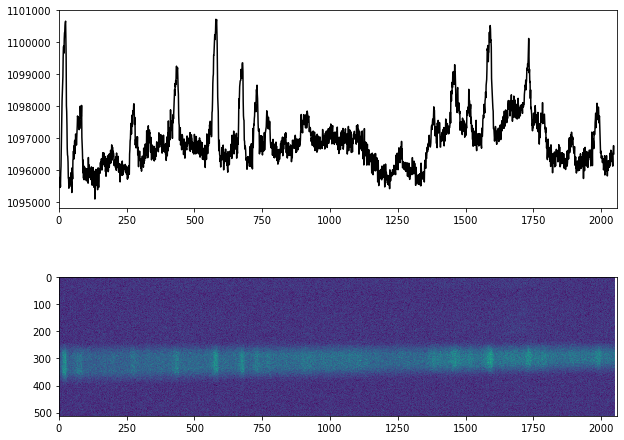

In [9]:
ds_disk = xr.open_dataset('test1.nc')
a = ds_disk.to_array()
ds_disk.close()
plot_image(a[0])

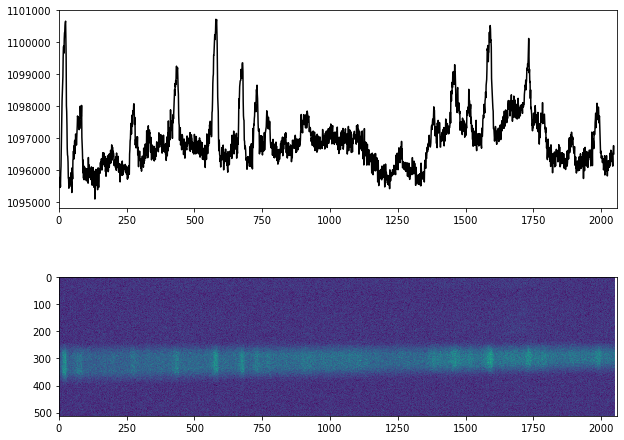

In [10]:
ds_disk = xr.open_dataset('test1.nc')
a = ds_disk.to_array()
ds_disk.close()
plot_image(a[0])

# Load and plot

In [11]:
import os
from os.path import join
%run imaging_tool.py


<Figure size 432x288 with 0 Axes>

In [12]:
basepath = r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20200826'
ls = os.listdir(basepath)

[(900, 1100), (900, 1100)]

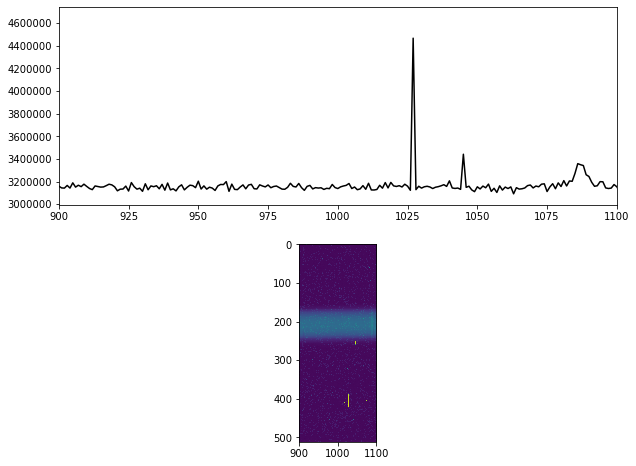

In [13]:
#### %run imaging_tool.py
i = 2
ls = sorted(os.listdir(basepath))
ls = [i for i in ls if 'Ar' in i]

f = ls[i]
fp = join(basepath, f)
data = xr.open_dataset(fp)
image_data = data.to_array()[0]
plot_image(image_data)
#[ax.axvline(1030,c='C3',ls='--') for ax in gcf().axes]
[ax.set_xlim(900,1100) for ax in gcf().axes]

(900, 1100)

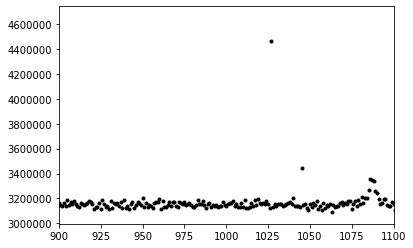

In [14]:
plot(image_data.sum(axis=0),'k.')
xlim(900,1100)